Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Read in Data

In [2]:
df = pd.read_csv('telco.csv')

Check Data

In [3]:
df.head(20)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


Check Missing values

In [4]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Drop rows with missing values in MSISDN/Number and Bearer ID

In [5]:
df = df[df['MSISDN/Number'].notna()]

In [6]:
df = df[df['Bearer Id'].notna()]

In [7]:
df = df.reset_index()

In [8]:
df.isnull().sum()

index                                            0
Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)  

Duplicate df

In [9]:
Df = df


sort columns to categorical and numerical.

In [10]:
num_cols = []
categorical_cols = []

In [11]:
def sort_cols(data):


    for i in data.columns:
        if data[i].dtypes == "object":
            categorical_cols.append(i)
        else :
            num_cols.append(i)

In [12]:
sort_cols(df)

Scale using standard scaler

In [13]:

df[num_cols] = StandardScaler().fit_transform(df[num_cols])

Fix missing values

In [14]:
def fix_cat_cols(data,cat_columns):
    for i in cat_columns:
        data[i] = data[i].fillna(data[i].mode()[0])

In [15]:
fix_cat_cols(df,categorical_cols)

In [16]:
def fix_num_cols(data,num_columns):
    for i in num_columns:
        data[i] = data[i].fillna(data[i].mean())

In [17]:
fix_num_cols(df,num_cols)

# Task 1



## Pre Task


Check top ten handsets used by customers

In [18]:
Top_10 = df['Handset Type'].value_counts()[:11]

In [19]:
Top_10 = Top_10.reset_index()

In [20]:
Top_10 = Top_10.loc[(Top_10['index']!= 'undefined')]

In [21]:
Top_10['Handset Type'] = Top_10['index']
Top_10.drop('index',axis= 1, inplace = True)
Top_10

,Handset Type
0,Huawei B528S-23A
1,Apple iPhone 6S (A1688)
2,Apple iPhone 6 (A1586)
4,Apple iPhone 7 (A1778)
5,Apple iPhone Se (A1723)
6,Apple iPhone 8 (A1905)
7,Apple iPhone Xr (A2105)
8,Samsung Galaxy S8 (Sm-G950F)
9,Apple iPhone X (A1901)
10,Samsung Galaxy A5 Sm-A520F


Check for top three handset manufacturers based on the data

In [22]:
df['Handset Manufacturer'].value_counts()[:3]

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

Group top five handset type by top three handset manufacturers

In [23]:
Apple = df.loc[(df['Handset Manufacturer']== 'Apple') & ((df['Handset Type'] == "Apple iPhone 6S (A1688)") 
                                                         | (df['Handset Type'] == "Apple iPhone 6 (A1586)") 
                                                         | (df['Handset Type'] == "Apple iPhone 7 (A1778)") 
                                                         | (df['Handset Type'] == "Apple iPhone Se (A1723)") 
                                                         | (df["Handset Type"] == "Apple iPhone 8 (A1905")),['Handset Manufacturer','Handset Type',]]


In [24]:

Apple.value_counts()[:5]

Handset Manufacturer  Handset Type           
Apple                 Apple iPhone 6S (A1688)    9395
                      Apple iPhone 6 (A1586)     8993
                      Apple iPhone 7 (A1778)     6279
                      Apple iPhone Se (A1723)    5165
dtype: int64

In [25]:
Samsung = df.loc[(df['Handset Manufacturer']== 'Samsung') & ((df['Handset Type'] == "Samsung Galaxy S8 (Sm-G950F)") 
                                                         | (df['Handset Type'] == "Samsung Galaxy A5 Sm-A520F") 
                                                         | (df['Handset Type'] == "Samsung Galaxy J5 (Sm-J530)") 
                                                         | (df['Handset Type'] == "Samsung Galaxy J3 (Sm-J330)") 
                                                         | (df["Handset Type"] == "Samsung Galaxy S7 (Sm-G930X)")),['Handset Manufacturer','Handset Type',]]

In [26]:
Samsung.value_counts()[:5]

Handset Manufacturer  Handset Type                
Samsung               Samsung Galaxy S8 (Sm-G950F)    4464
                      Samsung Galaxy A5 Sm-A520F      3700
                      Samsung Galaxy J5 (Sm-J530)     3675
                      Samsung Galaxy J3 (Sm-J330)     3456
                      Samsung Galaxy S7 (Sm-G930X)    3171
dtype: int64

In [27]:
Huawei = df.loc[(df['Handset Manufacturer']== 'Huawei') & ((df['Handset Type'] == "Huawei B528S-23A") 
                                                         | (df['Handset Type'] == "Huawei E5180") 
                                                         | (df['Handset Type'] == "Huawei P20") 
                                                         | (df['Handset Type'] == "Huawei P20 Lite Huawei Nova 3E") 
                                                         | (df["Handset Type"] == "Huawei Y6 2018")),['Handset Manufacturer','Handset Type',]]

In [28]:
Huawei.value_counts()[:5]

Handset Manufacturer  Handset Type                  
Huawei                Huawei B528S-23A                  19727
                      Huawei E5180                       2074
                      Huawei P20 Lite Huawei Nova 3E     2012
                      Huawei P20                         1475
                      Huawei Y6 2018                      996
dtype: int64

In [29]:
top_phones = pd.DataFrame()

In [30]:
top_phones['Handset Manufacturer'] = Apple['Handset Manufacturer']
top_phones['Handset Type'] = Apple['Handset Type']

In [31]:

top_phones = top_phones.merge(Samsung, how = 'outer')
top_phones = top_phones.merge(Huawei, how = 'outer')

In [32]:
top_phones

,Handset Manufacturer,Handset Type
0,Apple,Apple iPhone 6S (A1688)
1,Apple,Apple iPhone 6S (A1688)
2,Apple,Apple iPhone 6S (A1688)
3,Apple,Apple iPhone 6S (A1688)
4,Apple,Apple iPhone 6S (A1688)
...,...,...
74577,Huawei,Huawei P20
74578,Huawei,Huawei P20
74579,Huawei,Huawei P20
74580,Huawei,Huawei P20


In [33]:
handset_per_Manu = top_phones.groupby(['Handset Manufacturer','Handset Type'])

In [34]:
handset_per_Manu.first()

Empty DataFrame
Columns: []
Index: [(Apple, Apple iPhone 6 (A1586)), (Apple, Apple iPhone 6S (A1688)), (Apple, Apple iPhone 7 (A1778)), (Apple, Apple iPhone Se (A1723)), (Huawei, Huawei B528S-23A), (Huawei, Huawei E5180), (Huawei, Huawei P20), (Huawei, Huawei P20 Lite Huawei Nova 3E), (Huawei, Huawei Y6 2018), (Samsung, Samsung Galaxy A5 Sm-A520F), (Samsung, Samsung Galaxy J3 (Sm-J330)), (Samsung, Samsung Galaxy J5 (Sm-J530)), (Samsung, Samsung Galaxy S7 (Sm-G930X)), (Samsung, Samsung Galaxy S8 (Sm-G950F))]

This Analysis ascertain the most used handset type to be Huawei B528S-23A followed by other Iphones and Samsung, and Apple is the Handset manufacturer with the most used phone collectively followed by Samsung then Huawei makes up to around 50% of users.

It is recommended that policies and advertisement personalised to products from these manufacturers should be put in place

## Task 1.1


Scale Data using MinMax Scaler

In [35]:

#scaler = MinMaxScaler(feature_range=(5, 10))
#col_names = ["IMSI", "MSISDN/Number","IMEI","Bearer Id","Dur. (ms)"]
#df[col_names] = scaler.fit_transform(df[col_names])

Group users by Number of xDR sessions

In [36]:
user_per_xDR = df.groupby(['Bearer Id']).agg({'MSISDN/Number':'count'})
user_per_xDR


,MSISDN/Number
Bearer Id,
-1.116121,1
-1.116121,1
-1.116121,1
-1.116121,1
-1.116121,1
...,...
1.050646,1
1.050646,1
1.050646,1


Group User by duration of xDR session

In [37]:
user_per_xDR_session = df.groupby(['Dur. (ms)']).agg({'MSISDN/Number':'sum'})
user_per_xDR_session

,MSISDN/Number
Dur. (ms),
-1.208080,-0.003322
-1.208031,-0.003362
-1.207501,-0.003365
-1.206650,-0.003349
-1.206539,-0.003369
...,...
19.506116,-0.003379
20.572298,-0.003379
21.197923,-0.003363


Group user by total upload and download data.

In [38]:
total_UL_DL_per_User = df.groupby(['Total UL (Bytes)','Total DL (Bytes)']).agg({'MSISDN/Number':'sum'})
total_UL_DL_per_User

,,MSISDN/Number
Total UL (Bytes),Total DL (Bytes),
-3.391657,0.935484,-0.003349
-3.261152,0.402055,-0.003363
-3.249585,0.717858,-0.003381
-3.232819,1.570084,-0.003384
-3.232576,0.480364,-0.003348
...,...,...
3.173947,0.337714,-0.003354
3.195311,1.008599,-0.003359
3.215962,-1.184511,-0.003376


Group User by total data volume

In [39]:
df['Total_volume (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [40]:
Total_volume_per_user = df.groupby(['Total_volume (Bytes)']).agg({'MSISDN/Number':'sum'})
Total_volume_per_user

,MSISDN/Number
Total_volume (Bytes),
-4.811660,-0.003365
-4.687452,-0.003381
-4.632567,-0.003323
-4.595678,-0.003376
-4.471647,-0.003364
...,...
4.566717,-0.003364
4.573687,-0.003368
4.643469,-0.003349


## Task 1.2

Scale some columns manually.

In [41]:
substring = "(Bytes)"

In [42]:
bytes_first = [j for j in df.columns if substring in j]

In [43]:
for i in  bytes_first :
    df[i.replace('(Bytes)','(MB)')] = df[i]
    df.drop(i, axis = 1, inplace = True)

In [44]:
df['Social Media data'] = df['Social Media DL (MB)'] + df['Social Media UL (MB)']
df['Google data'] = df['Google DL (MB)'] + df['Google UL (MB)']
df['Email data'] = df['Email DL (MB)'] + df['Email UL (MB)']
df['Youtube data'] = df['Youtube DL (MB)'] + df['Youtube UL (MB)']
df['Netflix data'] = df['Netflix DL (MB)'] + df['Netflix UL (MB)']
df['Gaming data'] = df['Gaming DL (MB)'] + df['Gaming UL (MB)']
df['Other data'] = df['Other DL (MB)'] + df['Other UL (MB)']

Put relevant columns in a list

In [45]:
relevant_cols = ['Bearer Id','Dur. (ms)','Other data','Gaming data','Youtube data','Netflix data','Email data','Google data','Social Media data','Total UL (MB)','Total DL (MB)','Total_volume (MB)']

Sort relevant columns to categorical and numerical.

In [46]:
relevant_num = []
relevant_cat = []


In [47]:
for cols in relevant_cols:
    if df[cols].dtypes == 'object':
        relevant_cat.append(cols)
    else:
        relevant_num.append(cols)

Non graphical Univariate EDA for numerical relevant columns

In [48]:
for cols in relevant_num:
    print(df[cols].describe())
    print(f"Column name is {cols}")
    print(f'skewness for this column is {df[cols].skew()}')
    print(f'kurtosis for this column is {df[cols].kurtosis()}')
    Q3,Q1 = np.percentile(df[cols], [75,25])
    IQR = Q3 - Q1
    print(f'The IQR is {IQR}')
    print(f'The number of Unique value of column {cols} is : {df[cols].nunique()}')
    print('____________________________________________________________________')
    

count    1.485060e+05
mean    -4.561644e-16
std      1.000003e+00
min     -1.116121e+00
25%     -9.666889e-01
50%     -9.666889e-01
75%      1.000835e+00
max      1.050646e+00
Name: Bearer Id, dtype: float64
Column name is Bearer Id
skewness for this column is 0.02123683957624906
kurtosis for this column is -1.9954102878657825
The IQR is 1.967524067710332
The number of Unique value of column Bearer Id is : 134255
____________________________________________________________________
count    1.485060e+05
mean     2.641103e-17
std      1.000003e+00
min     -1.208080e+00
25%     -5.776968e-01
50%     -2.304735e-01
75%      3.435037e-01
max      2.163807e+01
Name: Dur. (ms), dtype: float64
Column name is Dur. (ms)
skewness for this column is 3.9687972251832564
kurtosis for this column is 37.2302083536995
The IQR is 0.9212005351841107
The number of Unique value of column Dur. (ms) is : 88816
____________________________________________________________________
count    1.485060e+05
mean     1

Non graphical Univariate EDA for categorical relevant columns

In [49]:
for cols in relevant_cat:
    print(df[cols].value_counts())
    print(df[cols].describe(include=['O']))

Graphical Univariate EDA for numerical relevant columns

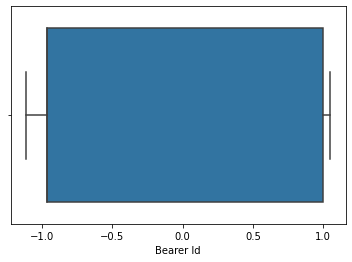

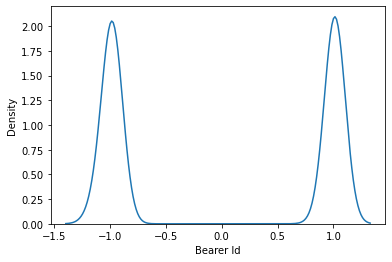

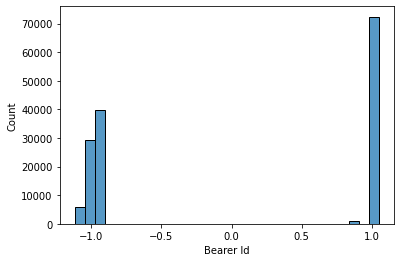

___________________________________________________________


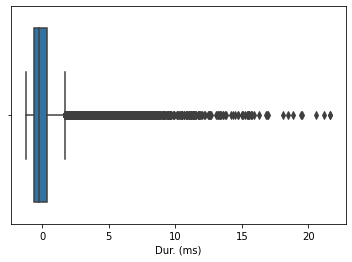

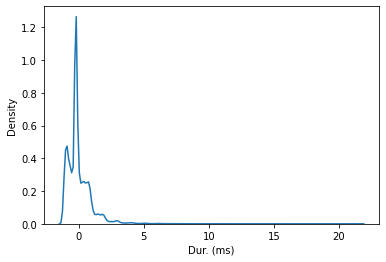

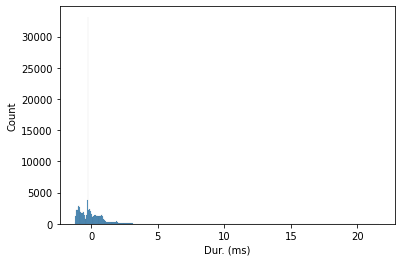

___________________________________________________________


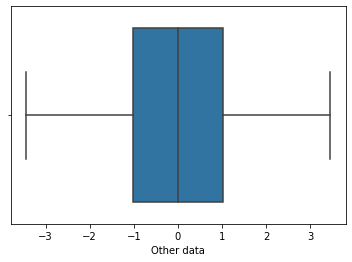

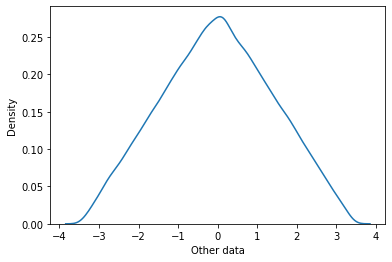

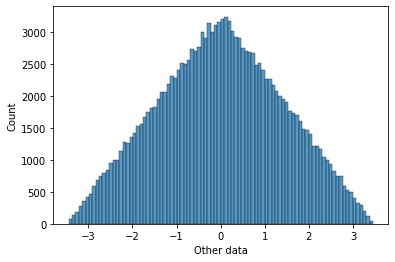

___________________________________________________________


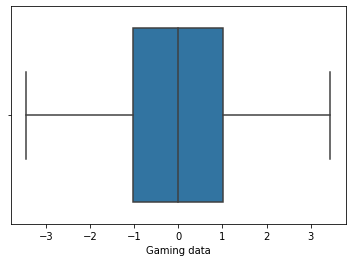

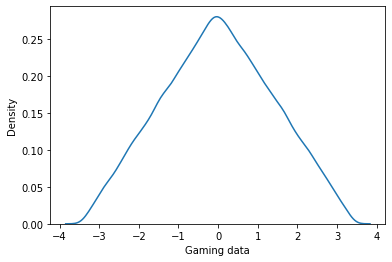

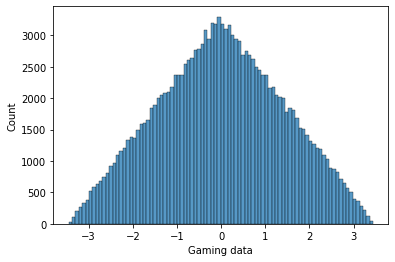

___________________________________________________________


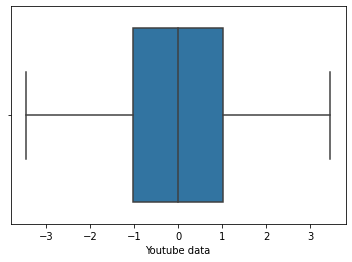

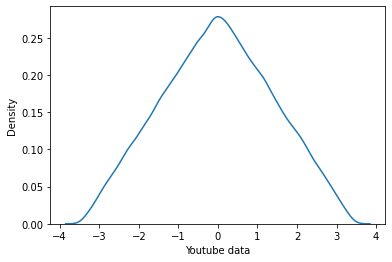

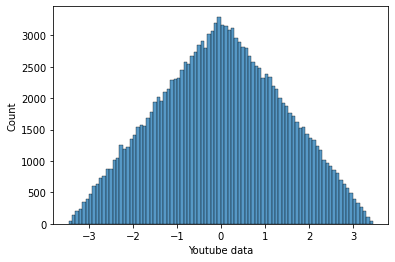

___________________________________________________________


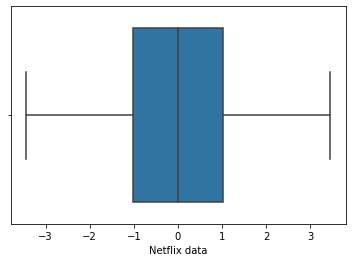

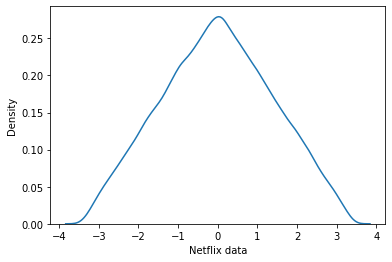

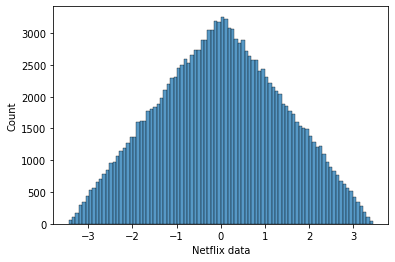

___________________________________________________________


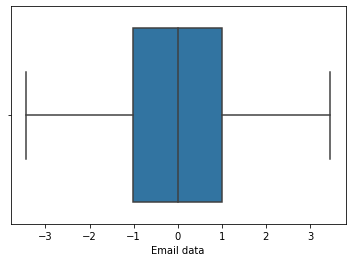

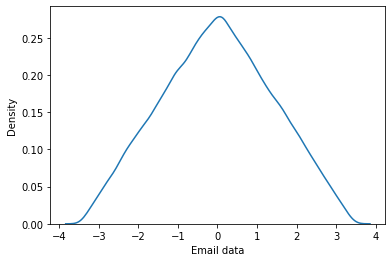

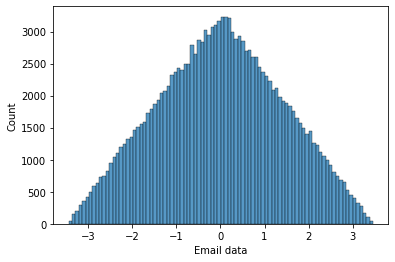

___________________________________________________________


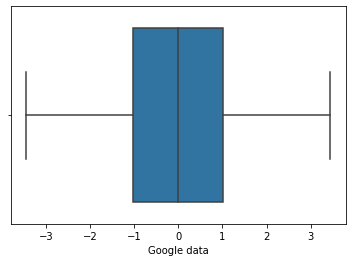

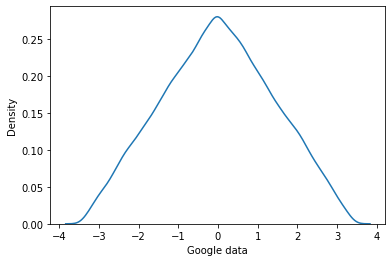

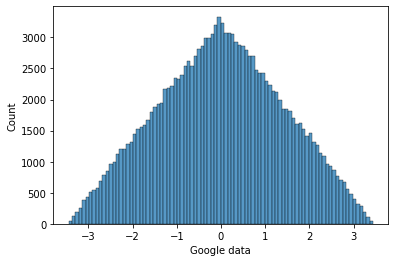

___________________________________________________________


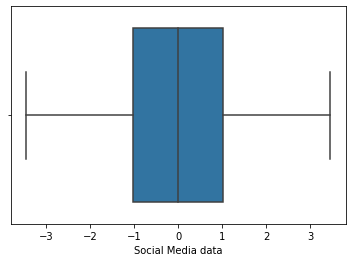

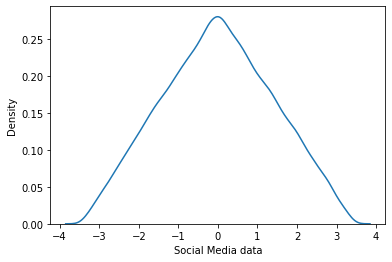

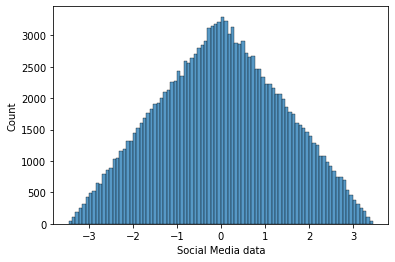

___________________________________________________________


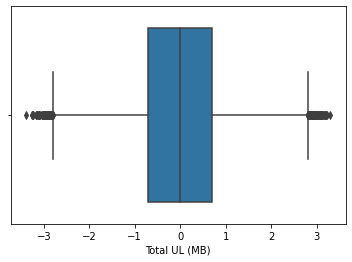

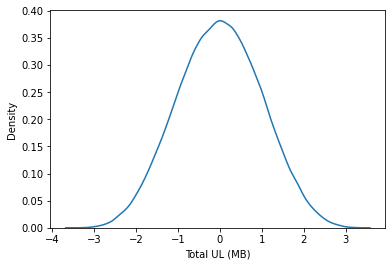

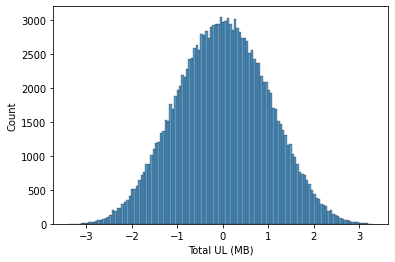

___________________________________________________________


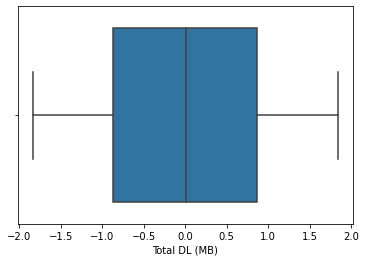

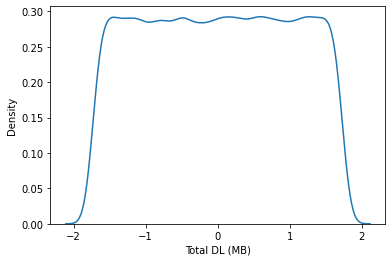

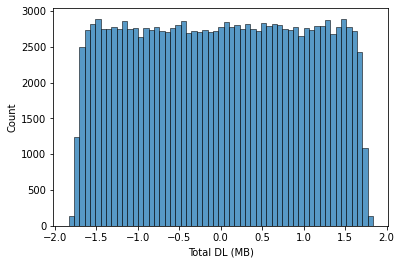

___________________________________________________________


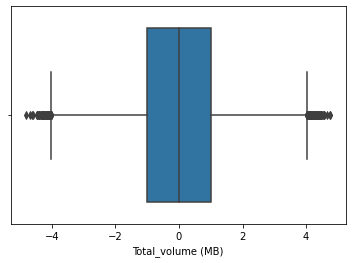

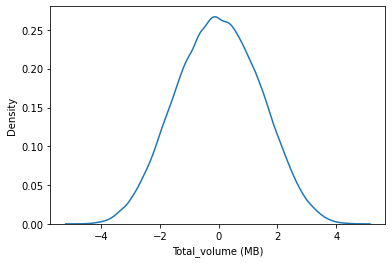

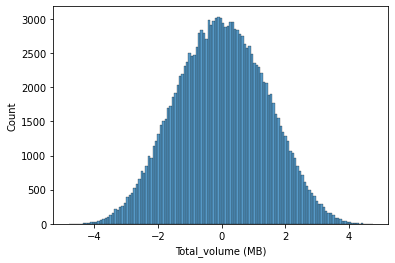

___________________________________________________________


In [50]:
for cols in relevant_num:
    sns.boxplot(data=df, x= cols )
    plt.show()
    sns.kdeplot(data=df, x= cols )
    plt.show()
    sns.histplot(data=df, x= cols )
    plt.show()
    print('___________________________________________________________')

Graphical Bivariate EDA for numerial columns

In [51]:
subs = '(MB)'

In [52]:
relevant_app = [j for j in relevant_cols if subs in j]

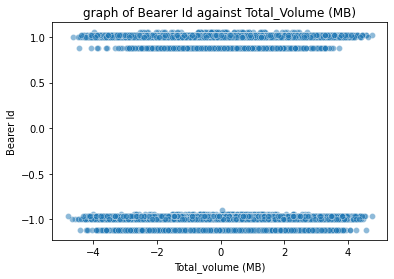

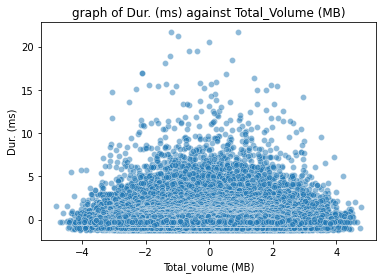

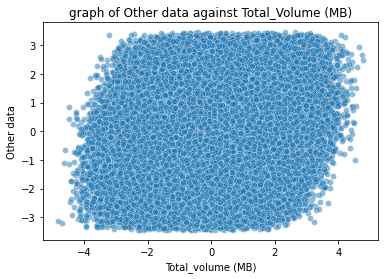

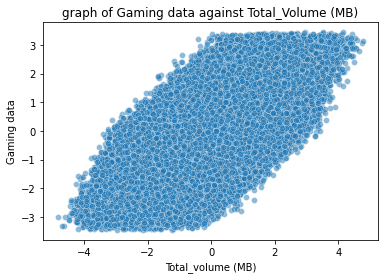

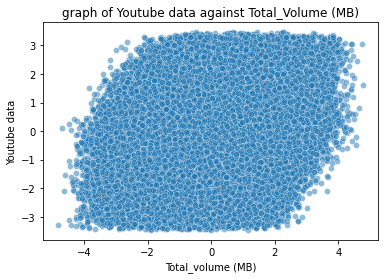

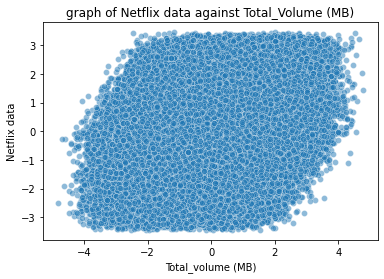

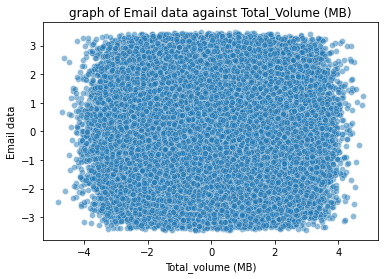

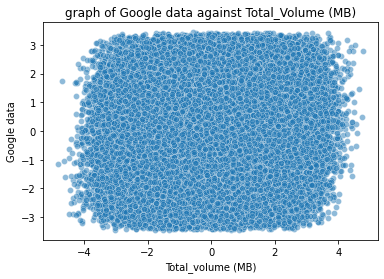

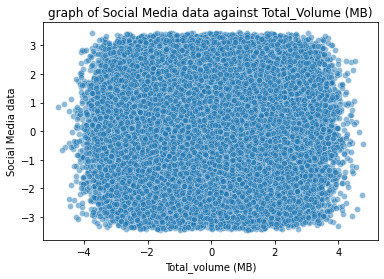

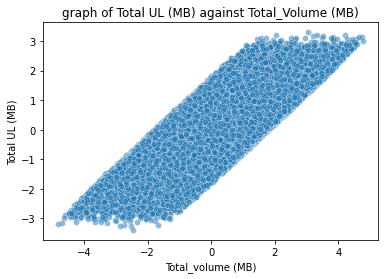

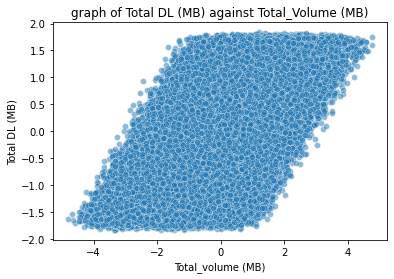

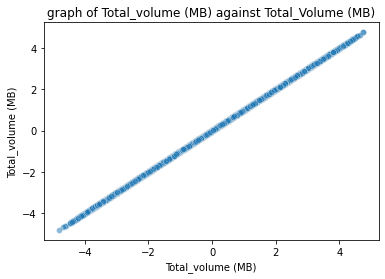

In [53]:
for i in relevant_num:
    sns.scatterplot(data=df,x='Total_volume (MB)',y=i,alpha=0.5)
    plt.title(f'graph of {i} against Total_Volume (MB)')
    plt.xlabel("Total_volume (MB)")
    plt.ylabel(i)
    plt.show()

Get top 5 deciles of users

In [54]:
df['top_5_decile_Dur. (MS)'] = pd.qcut(df['Dur. (ms)'], 10,labels=False,duplicates= 'drop')

In [55]:
top_5s = []

In [56]:
New_df = pd.DataFrame()
New_df['total_data_UL+DL'] = df['Total_volume (MB)']
New_df['MSISDN/Number'] = df['MSISDN/Number']
New_df['top_5_decile_Dur. (MS)'] = df['top_5_decile_Dur. (MS)']

new_df = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==0,:]
new_df1 = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==1,:]
new_df2 = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==2,:]
new_df3 = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==3,:]
new_df4 = New_df.loc[New_df["top_5_decile_Dur. (MS)"]==4,:]

new_df = pd.DataFrame(new_df.reset_index())
new_df1 = pd.DataFrame(new_df1.reset_index())
new_df2 = pd.DataFrame(new_df2.reset_index())
new_df3 = pd.DataFrame(new_df3.reset_index())
new_df4 = pd.DataFrame(new_df4.reset_index())



top_5s.append(new_df)
top_5s.append(new_df1)
top_5s.append(new_df2)
top_5s.append(new_df3)
top_5s.append(new_df4)

top_5s = pd.concat(top_5s,axis=0)

top_5s.drop("index",axis=1,inplace=True)

In [57]:
df['top_5_decile_Dur. (MS)'].value_counts()

3    31851
8    14851
6    14851
1    14851
0    14851
7    14850
2    14850
5    14849
4    12702
Name: top_5_decile_Dur. (MS), dtype: int64

In [58]:
top_5s

,total_data_UL+DL,MSISDN/Number,top_5_decile_Dur. (MS)
0,-2.101796,-0.003362,0
1,-0.535032,-0.003379,0
2,-0.164965,-0.003350,0
3,0.178151,-0.003363,0
4,-2.222821,-0.003364,0
...,...,...,...
12697,2.283184,-0.003364,4
12698,1.276416,-0.003363,4
12699,-2.160538,-0.003323,4
12700,-1.332378,-0.003364,4


In [59]:
top_5s['top_5_decile_Dur. (MS)'].value_counts()

3    31851
0    14851
1    14851
2    14850
4    12702
Name: top_5_decile_Dur. (MS), dtype: int64

Check for correlation of application columns, non graphical Bivariate EDA

In [60]:
df_data = pd.DataFrame()

df_data['Social Media data'] = df['Social Media DL (MB)'] + df['Social Media UL (MB)']
df_data['Google data'] = df['Google DL (MB)'] + df['Google UL (MB)']
df_data['Email data'] = df['Email DL (MB)'] + df['Email UL (MB)']
df_data['Youtube data'] = df['Youtube DL (MB)'] + df['Youtube UL (MB)']
df_data['Netflix data'] = df['Netflix DL (MB)'] + df['Netflix UL (MB)']
df_data['Gaming data'] = df['Gaming DL (MB)'] + df['Gaming UL (MB)']
df_data['Other data'] = df['Other DL (MB)'] + df['Other UL (MB)']



In [61]:
df_data.corr()




,Social Media data,Google data,Email data,Youtube data,Netflix data,Gaming data,Other data
Social Media data,1.000000,0.001194,0.002881,-0.001466,-0.000479,0.003119,0.001798
Google data,0.001194,1.000000,-0.001039,0.002798,-0.003449,-0.001952,-0.001702
Email data,0.002881,-0.001039,1.000000,-0.005217,0.001513,-0.000646,0.000414
Youtube data,-0.001466,0.002798,-0.005217,1.000000,0.003299,-0.002756,-0.000620
Netflix data,-0.000479,-0.003449,0.001513,0.003299,1.000000,-0.004189,-0.009223
Gaming data,0.003119,-0.001952,-0.000646,-0.002756,-0.004189,1.000000,-0.006410
Other data,0.001798,-0.001702,0.000414,-0.000620,-0.009223,-0.006410,1.000000


Scale columns using standard scaler

In [62]:

Df.drop(categorical_cols, axis=1, inplace=True)
Df = StandardScaler().fit_transform(Df)


Do the principal component analysis (PCA) of the data

In [63]:

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(Df)
principalDf = pd.DataFrame(data= principalComponents,columns = ['principal component 1', 'principal component 2','principal component 3'])

In [64]:
principalDf

,principal component 1,principal component 2,principal component 3
0,-4.231189,1.169221,18.973452
1,-3.397022,-2.380004,14.132482
2,-3.424065,2.603915,14.057937
3,-3.376432,-2.896268,13.725596
4,-2.963449,-0.270317,11.212895
...,...,...,...
148501,3.602707,-3.727054,-2.436700
148502,-1.232571,-2.616207,0.110077
148503,-1.321424,-1.092922,0.633402
148504,-1.253873,-0.402689,0.681122


- A reduced dimension as the number of columns reduced to 3 columns.
- More variance range because PCA considers differences between variance of columns and favours the ones with higher variance differences.
- More importance to instances (rows) since there will be more variance range, the distributions will have more space than before.
- Numerical Variables are implemented